In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
#https://www.kaggle.com/zynicide/wine-reviews/version/4

In [3]:
df = pd.read_csv("/home/scott/Downloads/winemag-data-130k-v2.csv")

In [4]:
df['year'] = df.title.str.findall("\d\d\d\d").apply(lambda x: x[0] if len(x) > 0 else None)
mask = df.year.isnull()

In [5]:
df = df[~mask]
df.year = df.year.apply(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125362 entries, 0 to 129970
Data columns (total 15 columns):
Unnamed: 0               125362 non-null int64
country                  125301 non-null object
description              125362 non-null object
designation              88202 non-null object
points                   125362 non-null int64
price                    116838 non-null float64
province                 125301 non-null object
region_1                 104667 non-null object
region_2                 49756 non-null object
taster_name              100200 non-null object
taster_twitter_handle    95334 non-null object
title                    125362 non-null object
variety                  125361 non-null object
winery                   125362 non-null object
year                     125362 non-null int64
dtypes: float64(1), int64(3), object(11)
memory usage: 15.3+ MB


In [10]:
print(round(df.price.mean(), 1))
print(df.price.median())
print(df.price.mode().values[0])

35.5
25.0
20.0


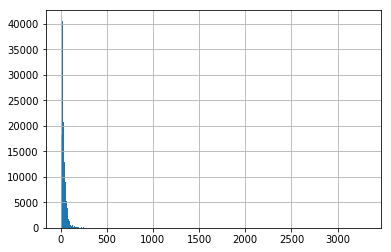

In [11]:
df.price.hist(bins=300)
plt.show()

In [12]:
df.price.max()

3300.0

In [13]:
df.price.fillna(df.price.median(), inplace=True)

In [14]:
df['description_length'] = df.description.apply(len)

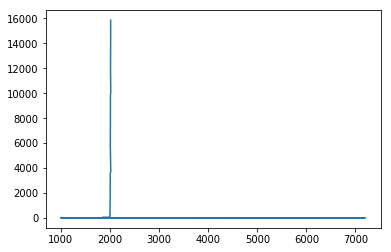

In [16]:
df.year.value_counts().plot()

In [17]:
mask = (df.year < 1995) | (df.year > 2017)
df = df[~mask]

In [18]:
df.points.min(), df.points.max()

(80, 100)

In [19]:
df['points_normalized'] = (df.points - 80) / 2

In [20]:
df.points_normalized.min(), df.points_normalized.max()

(0.0, 10.0)

In [21]:
df.dropna(subset=['country'], inplace=True)

In [22]:
len(df)

125011

In [23]:
df.drop(df.columns[0], axis=1, inplace=True)

In [34]:
df.to_excel("wine_data.xlsx")